<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Papers/blob/main/AlexNet_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.11.0'

#Data 
[Source](https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification)

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification
!unzip \*.zip && rm .zip

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/train/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    shuffle    = True
)


valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/valid/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    shuffle    = True
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory  = '/content/Plants_2/test/',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224, 224),
    shuffle    = True
)

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


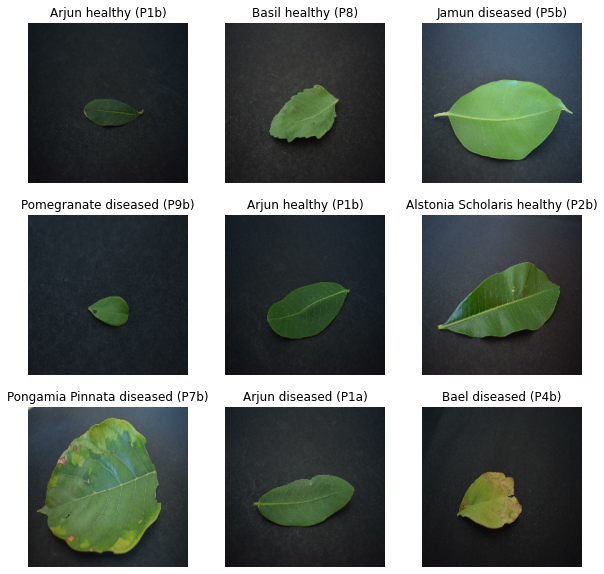

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(test_ds.class_names[np.argmax(labels[i])])
    plt.axis('off')

    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[np.argmax(labels[i])])
    plt.axis("off")

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, padding='valid', activation='relu', strides=4, kernel_initializer= 'he_normal', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=256,  kernel_size=5, padding='same',  activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dense(units=len(train_ds.class_names), activation='softmax')
])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 384)      

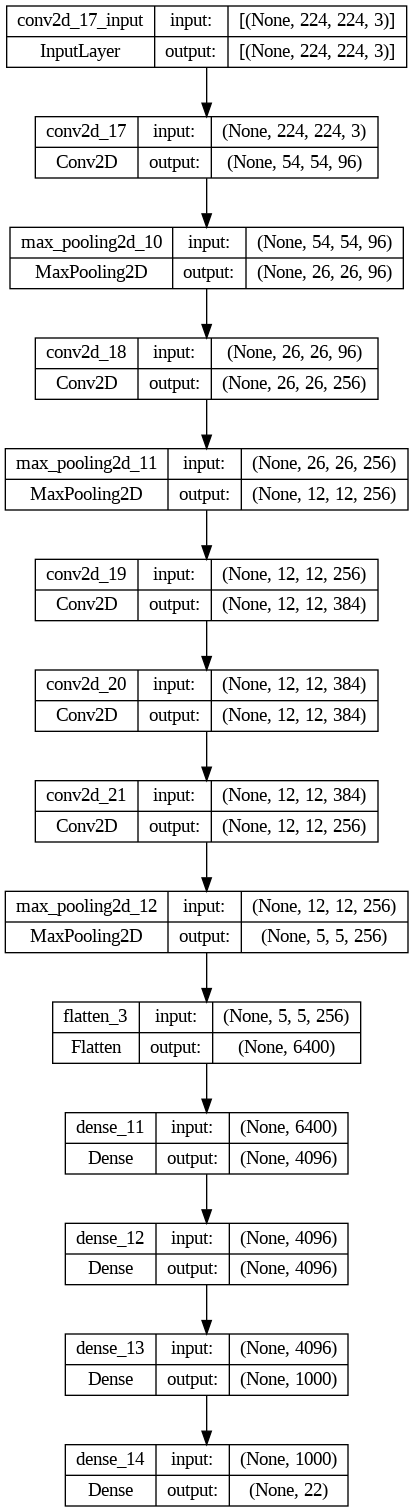

In [20]:
model.summary()
tf.keras.utils.plot_model(model, "AlexNet.png", show_shapes=True)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.1), 
              metrics=["accuracy"])

model.fit(train_ds, epochs=2, steps_per_epoch=len(train_ds)//3, validation_data=valid_ds, validation_steps=len(valid_ds)//3)